<a href="https://colab.research.google.com/github/somesh636/DDoS_Attack_Analysis/blob/master/DDoS_ML_AI_TTSData_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
DrDoS_DNS_data_1_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_DNS_data_1_per.csv')
DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_LDAP_data_2_0_per.csv')
DrDoS_MSSQL_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_MSSQL_data_1_3_per.csv')
DrDoS_NetBIOS_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_NetBIOS_data_1_3_per.csv')
DrDoS_NTP_data_data_5_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_NTP_data_data_5_per.csv')
DrDoS_SNMP_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_SNMP_data_1_3_per.csv')
DrDoS_SSDP_data_2_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_SSDP_data_2_per.csv')
DrDoS_UDP_data_2_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_UDP_data_2_per.csv')
Syn_data_4_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/syn_data.csv')
UDPLag_data_2_0_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/UDPLag_data_2_0_per.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Merge all the Dataset to make one data 
data = pd.concat([DrDoS_DNS_data_1_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_NetBIOS_data_1_3_per, DrDoS_NTP_data_data_5_per, DrDoS_SNMP_data_1_3_per, DrDoS_SSDP_data_2_per, DrDoS_UDP_data_2_per, Syn_data_4_per, UDPLag_data_2_0_per], ignore_index = True)

In [7]:
data.shape

(585970, 89)

In [8]:
data[' Label'].value_counts()

DrDoS_SNMP       67076
UDP-lag          66072
DrDoS_UDP        62702
DrDoS_NTP        60129
DrDoS_MSSQL      58802
Syn              58347
DrDoS_LDAP       54496
DrDoS_NetBIOS    53214
DrDoS_SSDP       52216
DrDoS_DNS        50715
BENIGN            2122
WebDDoS             79
Name:  Label, dtype: int64

In [9]:
# Drop Unnamed:0, Unnamed:0.1 columns 
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [10]:
data.columns 

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [11]:
data_real = data.replace(np.inf, np.nan)

In [12]:
data_real.isnull().sum().sum()

23612

In [13]:
data_df = data_real.dropna(axis=0)

In [14]:
data_df.isnull().sum().sum()

0

In [15]:
data_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-556-16923-17,172.16.0.5,556,192.168.50.1,16923,17,2018-12-01 11:13:44.496470,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2144.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1072.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1.0,DrDoS_DNS
1,172.16.0.5-192.168.50.1-690-38772-17,172.16.0.5,690,192.168.50.1,38772,17,2018-12-01 11:12:47.056822,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1.0,DrDoS_DNS
2,172.16.0.5-192.168.50.1-761-24941-17,172.16.0.5,761,192.168.50.1,24941,17,2018-12-01 11:12:58.063304,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1.0,DrDoS_DNS
3,172.16.0.5-192.168.50.1-526-22632-17,172.16.0.5,526,192.168.50.1,22632,17,2018-12-01 11:10:57.969713,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1.0,DrDoS_DNS
4,172.16.0.5-192.168.50.1-546-5185-17,172.16.0.5,546,192.168.50.1,5185,17,2018-12-01 11:11:40.592201,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2280.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1140.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1.0,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [16]:
# data_df.to_csv('data_final.csv', index = False)
# from google.colab import files
# files.download('data_final.csv')

In [17]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [18]:
data_X.columns 

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [19]:
data_X.shape 

(574164, 85)

In [20]:
data_y = data_df[' Label']

In [21]:
data_y.shape 

(574164,)

In [22]:
data_df.isnull().sum().sum()

0

In [23]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS'], dtype=object)

In [24]:
data_X 

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-556-16923-17,172.16.0.5,556,192.168.50.1,16923,17,2018-12-01 11:13:44.496470,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2144.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1072.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
1,172.16.0.5-192.168.50.1-690-38772-17,172.16.0.5,690,192.168.50.1,38772,17,2018-12-01 11:12:47.056822,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
2,172.16.0.5-192.168.50.1-761-24941-17,172.16.0.5,761,192.168.50.1,24941,17,2018-12-01 11:12:58.063304,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
3,172.16.0.5-192.168.50.1-526-22632-17,172.16.0.5,526,192.168.50.1,22632,17,2018-12-01 11:10:57.969713,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
4,172.16.0.5-192.168.50.1-546-5185-17,172.16.0.5,546,192.168.50.1,5185,17,2018-12-01 11:11:40.592201,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2280.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1140.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Label Encoding for the Dataset 

In [25]:
from sklearn.preprocessing import LabelEncoder 

In [26]:
le = LabelEncoder()

In [27]:
data_y_trans = le.fit_transform(data_y)

In [28]:
data_y_trans

array([ 1,  1,  1, ..., 10, 10, 10])

In [29]:
le_fid = LabelEncoder()

In [30]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [31]:
le_SIP = LabelEncoder()

In [32]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [33]:
le_DIP = LabelEncoder()

In [34]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [35]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [36]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,205418,17,556,129,16923,17,153807,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2144.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1072.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
1,356277,17,690,129,38772,17,149038,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
2,390438,17,761,129,24941,17,149918,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
3,172900,17,526,129,22632,17,139638,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
4,194820,17,546,129,5185,17,143350,1.0,2.0,0.0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,2280.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,1140.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585965,38260,17,26917,129,29675,6,555528,104.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3.846154e+04,3.466667e+01,5.831238e+01,102.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0

In [37]:
data_X.dtypes

Flow ID                int64
 Source IP             int64
 Source Port           int64
 Destination IP        int64
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound             float64
Length: 85, dtype: object

### Feature Selection 

In [38]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [40]:
model.feature_importances_

array([4.55691632e-02, 1.05536287e-03, 6.07409979e-02, 4.58689181e-03,
       1.09243515e-02, 2.69234462e-02, 3.18773279e-01, 2.12886562e-03,
       4.94245245e-03, 1.89339061e-04, 1.55905431e-02, 4.16611954e-05,
       3.93580036e-02, 5.01477293e-02, 3.56746039e-02, 3.33406045e-03,
       4.44009140e-04, 2.17114614e-03, 3.51474416e-04, 3.05095572e-05,
       3.08077317e-02, 1.57018741e-02, 3.50672156e-03, 1.95113249e-03,
       3.01241816e-03, 2.95024968e-03, 2.74855882e-03, 3.00954810e-03,
       2.14181795e-03, 3.36396944e-03, 3.01320312e-03, 1.65141303e-04,
       2.48395815e-04, 1.40391633e-04, 1.60190778e-04, 2.66552490e-04,
       8.40458843e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.10587679e-03, 1.65195799e-04, 1.71172483e-02, 3.66112904e-04,
       5.07671691e-02, 2.94632407e-02, 4.08119261e-02, 1.57542792e-03,
       1.11100325e-03, 0.00000000e+00, 1.15744663e-05, 5.27714114e-05,
       0.00000000e+00, 3.69356260e-02, 5.04022416e-04, 1.73879536e-04,
      

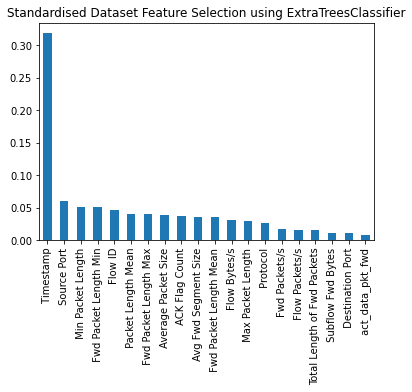

In [39]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [41]:
data_X.shape 

(574164, 85)

In [42]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [43]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,153807,556,1472.0,1472.0,205418,1472.0,1472.0,2208.0,0.0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944.0,16923,1.0
1,149038,690,1472.0,1472.0,356277,1472.0,1472.0,2208.0,0.0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944.0,38772,1.0
2,149918,761,1472.0,1472.0,390438,1472.0,1472.0,2208.0,0.0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944.0,24941,1.0
3,139638,526,1472.0,1472.0,172900,1472.0,1472.0,2208.0,0.0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944.0,22632,1.0
4,143350,546,1472.0,1472.0,194820,1472.0,1472.0,2208.0,0.0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944.0,5185,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585965,555528,26917,0.0,0.0,38260,0.0,0.0,0.0,1.0,0.0,0.0,0.000000e+00,0.0,6,1.923077e+04,3.846154e+04,0.0,0.0,29675,0.0
585966,514638,33856,375.0,375.0,54237,375.0,375.0,562.5,0.0,375.0,375.0,3.750000e+08,375.0,17,1.000000e+06,1.000000e+06,750.0,750.0,60933,1.0
585967,552548,10655,0.0,0.0,11899,0.0,0.0,0.0,1.0,0.0,0.0,0.000000e+00,0.0,6,4.000000e+04,4.000000e+04,0.0,0.0,18473,0.0
585968,534101,63789,0.0,0.0,309616,0.0,0.0,0.0,1.0,0.0,0.0,0.000000e+00,0.0,6,1.766939e-01,1.766939e-01,0.0,0.0,3373,0.0


### Train Test Split Normal dataset 84 Features 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [45]:
X_train.shape 

(401914, 85)

In [46]:
X_test.shape 

(172250, 85)

### Standardization of the 84 Feature Dataset 

In [47]:

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset 

In [48]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

### Standardization of the 20 Feature Dataset 

In [49]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [50]:
X_train_std_20.shape 

(401914, 20)

In [51]:
y_train_20.shape

(401914,)

In [52]:
X_test_std_20.shape 

(172250, 20)

In [53]:
y_test_20.shape 

(172250,)

### 1. Random Forest Classification 

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rf_y_pred = rf.predict(X_test_std_20)

In [56]:
rf_y_pred

array([ 4,  6,  4, ..., 10,  2, 10])

In [57]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [59]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.91      1.00      0.95       616
    DrDoS_DNS       0.99      1.00      0.99     14699
   DrDoS_LDAP       0.99      0.99      0.99     15992
  DrDoS_MSSQL       0.99      1.00      0.99     17017
    DrDoS_NTP       1.00      1.00      1.00     17886
DrDoS_NetBIOS       0.99      0.99      0.99     15529
   DrDoS_SNMP       0.99      0.99      0.99     20133
   DrDoS_SSDP       0.99      0.99      0.99     15562
    DrDoS_UDP       0.99      0.99      0.99     18565
          Syn       1.00      1.00      1.00     16340
      UDP-lag       1.00      0.99      1.00     19883
      WebDDoS       1.00      0.61      0.76        28

     accuracy                           0.99    172250
    macro avg       0.99      0.96      0.97    172250
 weighted avg       0.99      0.99      0.99    172250



In [60]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[  615     1     0     0     0     0     0     0     0     0     0     0]
 [    1 14659     0     0    36     3     0     0     0     0     0     0]
 [    3   208 15779     2     0     0     0     0     0     0     0     0]
 [    1     0    82 16933     0     0     0     1     0     0     0     0]
 [   26     0     0     0 17860     0     0     0     0     0     0     0]
 [    1     7     0   158     0 15361     1     1     0     0     0     0]
 [    5     1     0     0     0   185 19942     0     0     0     0     0]
 [    1     0     0     0     0     0   182 15377     2     0     0     0]
 [    3     0     0     0     0     0     0   171 18390     0     1     0]
 [    5     0     0     0     0     0     0     0     0 16335     0     0]
 [    6     0     0     0     0     0     0     0   184     0 19693     0]
 [    8     0     0     0     0     0     0     0     0     0     3    17]]


In [61]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.25166908563135


### 2. Decision Tree 

In [62]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
dt_y_pred = dt.predict(X_test_std_20)

In [65]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.82      1.00      0.90       616
    DrDoS_DNS       0.99      0.99      0.99     14699
   DrDoS_LDAP       0.98      0.99      0.99     15992
  DrDoS_MSSQL       0.99      0.98      0.99     17017
    DrDoS_NTP       0.99      1.00      0.99     17886
DrDoS_NetBIOS       0.99      0.99      0.99     15529
   DrDoS_SNMP       0.99      0.99      0.99     20133
   DrDoS_SSDP       0.99      0.99      0.99     15562
    DrDoS_UDP       0.99      0.99      0.99     18565
          Syn       1.00      0.99      1.00     16340
      UDP-lag       1.00      0.99      0.99     19883
      WebDDoS       0.44      0.25      0.32        28

     accuracy                           0.99    172250
    macro avg       0.93      0.93      0.93    172250
 weighted avg       0.99      0.99      0.99    172250



In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

In [ ]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

### SVM 

In [66]:
from sklearn.svm import LinearSVC

In [67]:
svm =  LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_20, y_train_20)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [68]:
y_pred_svm = svm.predict(X_test_std_20) 

In [69]:
svm.score(X_test_std_20, y_test_20)

0.9275413642960812

In [70]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_svm)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.95      0.86      0.90       616
    DrDoS_DNS       0.90      0.89      0.90     14699
   DrDoS_LDAP       0.94      0.95      0.95     15992
  DrDoS_MSSQL       0.86      0.93      0.89     17017
    DrDoS_NTP       1.00      0.96      0.98     17886
DrDoS_NetBIOS       0.87      0.99      0.93     15529
   DrDoS_SNMP       0.98      0.96      0.97     20133
   DrDoS_SSDP       0.99      0.68      0.80     15562
    DrDoS_UDP       0.80      1.00      0.89     18565
          Syn       1.00      1.00      1.00     16340
      UDP-lag       1.00      0.90      0.95     19883
      WebDDoS       0.48      0.57      0.52        28

     accuracy                           0.93    172250
    macro avg       0.90      0.89      0.89    172250
 weighted avg       0.94      0.93      0.93    172250



In [71]:
svm_conf_mat = confusion_matrix(y_test_20, y_pred_svm)
print("SVM Confusion Matrix: \n", svm_conf_mat)

SVM Confusion Matrix: 
 [[  530     0     0    44     6     0     0     0     0    21    13     2]
 [    0 13109   805   348    40   397     0     0     0     0     0     0]
 [    1   730 15226    19     2    12     0     2     0     0     0     0]
 [    1     0   178 15853     0   967     1    16     0     0     0     1]
 [    7   685     2    39 17136     7     0     2     0     8     0     0]
 [    0     0     2   143     0 15380     0     3     0     0     0     1]
 [    0     0     0     3     0   883 19242     1     0     0     0     4]
 [    1     0     0  2059     0    11   273 10518  2700     0     0     0]
 [    1     0     0     0     0     4    32    49 18477     0     0     2]
 [    9     0     0    17     0     0     0     0     0 16314     0     0]
 [    1     0     0     0     0     0    10     0  1897     0 17968     7]
 [    8     0     0     0     0     0     0     0     0     0     4    16]]


In [72]:
acc_score_svm = accuracy_score(y_test_20, y_pred_svm)
print("Accuracy Score for SVM: \n", acc_score_svm*100)

Accuracy Score for SVM: 
 92.75413642960812


### 3. Naive Bayes 

In [87]:
from sklearn.naive_bayes import GaussianNB 

In [88]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [89]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Naive Bayes: 
                precision    recall  f1-score   support

       BENIGN       0.61      0.96      0.75       616
    DrDoS_DNS       0.63      0.02      0.04     14699
   DrDoS_LDAP       0.54      0.99      0.70     15992
  DrDoS_MSSQL       0.93      0.99      0.96     17017
    DrDoS_NTP       0.99      0.98      0.99     17886
DrDoS_NetBIOS       0.95      0.99      0.97     15529
   DrDoS_SNMP       0.98      0.96      0.97     20133
   DrDoS_SSDP       0.95      0.31      0.47     15562
    DrDoS_UDP       0.58      0.99      0.73     18565
          Syn       1.00      1.00      1.00     16340
      UDP-lag       1.00      0.85      0.92     19883
      WebDDoS       0.00      0.00      0.00        28

     accuracy                           0.82    172250
    macro avg       0.76      0.75      0.71    172250
 weighted avg       0.86      0.82      0.79    172250



In [91]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[  594     0     0     0     0     0     0     0     0    14     8     0]
 [  184   332 13324   694   163     2     0     0     0     0     0     0]
 [    3   176 15770    43     0     0     0     0     0     0     0     0]
 [    3     5   153 16832     1     0     9    14     0     0     0     0]
 [  143     9     0   162 17572     0     0     0     0     0     0     0]
 [    4     0     1   167     0 15342     1    14     0     0     0     0]
 [   11     5     0    10     0   870 19233     4     0     0     0     0]
 [    6     0     0     2     2     0   273  4831 10448     0     0     0]
 [    5     0     0     1     0     0    28   206 18321     0     4     0]
 [    9     0     0    17     0     0     0     0     0 16314     0     0]
 [    4     0     0   152     0     0   123    30  2648     0 16926     0]
 [    0     0     0     0     0     0     0     0     0     0    28     0]]


In [92]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 82.47721335268506


### 3. MLP 

In [73]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [74]:
y_train_MLP_20 = np.array(y_train_20)
y_test_MLP_20 = np.array(y_test_20)

y_train_MLP_onehot_20 = to_categorical(y_train_MLP_20)
y_test_MLP_onehot_20 = to_categorical(y_test_MLP_20)

X_train_20_MLP = np.array(X_train_std_20)
X_test_20_MLP = np.array(X_test_std_20)

In [75]:
# y_train_MLP = np.array(y_train)
# y_test_MLP = np.array(y_test)

# y_train_MLP_onehot = to_categorical(y_train_MLP)
# y_test_MLP_onehot = to_categorical(y_test_MLP)

# X_train_MLP = np.array(X_train_std)
# X_test_MLP = np.array(X_test_std)

In [85]:
batch_size = 1000

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=20,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(2024,activation='relu'))  
model.add(Dropout(0.01))
# model.add(Dense(3024,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(2500,activation='relu'))  
# model.add(Dropout(0.01))
model.add(Dense(2000,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1000,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(500,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(200,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(12))
model.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [86]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.fit(X_train_20_MLP, y_train_MLP_onehot_20, validation_data=(X_test_20_MLP, y_test_MLP_onehot_20),batch_size=batch_size, nb_epoch=100,callbacks=[monitor])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 401914 samples, validate on 172250 samples
Epoch 1/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.3691 - accuracy: 0.8617 - val_loss: 0.1744 - val_accuracy: 0.9337
Epoch 2/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.1612 - accuracy: 0.9398 - val_loss: 0.1155 - val_accuracy: 0.9439
Epoch 3/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.1229 - accuracy: 0.9516 - val_loss: 0.0828 - val_accuracy: 0.9644
Epoch 4/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.0989 - accuracy: 0.9593 - val_loss: 0.1141 - val_accuracy: 0.9589
Epoch 5/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.0991 - accuracy: 0.9615 - val_loss: 0.0629 - val_accuracy: 0.9769
Epoch 6/100
401914/401914 [==============================] - 11s 28us/step - loss: 0.0858 - accuracy: 0.9647 - val_loss: 0.1120 - val_accuracy: 0.9598
Epoch 7/100
401914/401914 [===============

In [78]:
y_pred_MLP = model.predict_classes(X_test_20_MLP)

In [79]:
y_pred_MLP

array([ 4,  6,  4, ..., 10,  2, 10])

In [82]:
print("Classification Report for MLP: \n", classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_MLP)))

Classification Report for MLP: 
                precision    recall  f1-score   support

       BENIGN       0.99      0.97      0.98       616
    DrDoS_DNS       0.99      0.99      0.99     14699
   DrDoS_LDAP       0.99      0.99      0.99     15992
  DrDoS_MSSQL       0.99      0.99      0.99     17017
    DrDoS_NTP       0.99      1.00      1.00     17886
DrDoS_NetBIOS       0.98      0.99      0.99     15529
   DrDoS_SNMP       0.99      0.99      0.99     20133
   DrDoS_SSDP       0.99      0.97      0.98     15562
    DrDoS_UDP       0.98      0.99      0.99     18565
          Syn       1.00      1.00      1.00     16340
      UDP-lag       1.00      0.99      0.99     19883
      WebDDoS       0.65      0.93      0.76        28

     accuracy                           0.99    172250
    macro avg       0.96      0.98      0.97    172250
 weighted avg       0.99      0.99      0.99    172250



In [83]:
mlp_conf_mat = confusion_matrix(y_test, y_pred_MLP)
print("MLP Confusion: \n", mlp_conf_mat)

MLP Confusion: 
 [[  597     0     0     0     3     0     0     0     0    14     0     2]
 [    0 14565    23     0   111     0     0     0     0     0     0     0]
 [    0   206 15785     1     0     0     0     0     0     0     0     0]
 [    0     0    87 16929     0     1     0     0     0     0     0     0]
 [    0     0     0     0 17886     0     0     0     0     0     0     0]
 [    0     0     0   159     0 15331    39     0     0     0     0     0]
 [    0     0     0     0     0   265 19867     1     0     0     0     0]
 [    1     0     0     0     0     0   260 15115   186     0     0     0]
 [    1     0     0     0     0     0     0    78 18409     0    77     0]
 [    7     0     0     0     0     0     0     0     0 16333     0     0]
 [    0     0     0     0     0     0     0     0   180     0 19691    12]
 [    0     0     0     0     0     0     0     0     0     0     2    26]]


In [84]:
acc_score_mlp = accuracy_score(y_test_20, y_pred_MLP)
print("Accuracy Score for MLP: \n", acc_score_mlp*100)

Accuracy Score for SVM: 
 99.00377358490566
